In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inline

from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.append('./src')

from data_queries import  getClusterInfo, getGAIAKnownMembers
from coeval import coeval
from gaiastars import gaiastars as gs,gaiadr2xdr3

import astropy.units as u
from astropy.coordinates import SkyCoord

In [52]:
    #trumpler meta data
    trumpler_df = pd.DataFrame([
        ['Trumpler14', '10:43:55.4','-59:32:16', 2.37,0.15, 264, -6.58, 0.06, 2.185, 0.084],
        ['Trumpler15', '10:44:40.8', '-59:22:10', 2.36, 0.09, 320, np.nan, np.nan, np.nan, np.nan],
        ['Trumpler16', '10:45:10.6', '-59:42:28', 2.32,0.12, 320, -6.931,0.063, 2.612, 0.058]
    ], columns=['ClusterName','ra', 'dec','distance','disterr','radius','pm_ra_cosdec','pm_ra_cosdec_error','pm_dec','pm_dec_error']
    ).set_index('ClusterName')
    trumpler_coords = SkyCoord(ra=trumpler_df.ra, dec=trumpler_df.dec,
        pm_ra_cosdec = list(trumpler_df.pm_ra_cosdec)*u.mas/u.year,
        pm_dec = list(trumpler_df.pm_dec)*u.mas/u.year,
        unit=(u.hourangle, u.deg),
        distance = list(trumpler_df.distance)*u.kpc)


In [53]:
carina_known_members = pd.read_csv('./data/carina_members.csv', comment='#')

In [54]:
for cl, cluster in carina_known_members.groupby('Cluster'):
    print(f'Cluster: {cl}, Number of members: {len(cluster)}')

Cluster: Bochum11, Number of members: 5
Cluster: Other, Number of members: 19
Cluster: Trumpler14, Number of members: 20
Cluster: Trumpler15, Number of members: 3
Cluster: Trumpler16, Number of members: 21


## Fix this Later

In [55]:
from gaiastars import gaiadr2xdr3
xmatch = {}
for cl, cluster in carina_known_members.groupby('Cluster'):
    print(f'Cluster: {cl}')
    known_members = list(cluster['Gaia Number'].astype(int))
    xmatch[cl] = gaiadr2xdr3(known_members, nearest=True)


Cluster: Bochum11
INFO: Query finished. [astroquery.utils.tap.core]
Cluster: Other
INFO: Query finished. [astroquery.utils.tap.core]
Cluster: Trumpler14
INFO: Query finished. [astroquery.utils.tap.core]
Cluster: Trumpler15


/home/kevin_leo_mcmanus/anaconda3/envs/astro/lib/python3.7/site-packages/ipykernel_launcher.py:6: TableReplaceWarning: converted column 'dr2_source_id' from integer to float
  
/home/kevin_leo_mcmanus/anaconda3/envs/astro/lib/python3.7/site-packages/ipykernel_launcher.py:6: TableReplaceWarning: converted column 'dr3_source_id' from integer to float
  


INFO: Query finished. [astroquery.utils.tap.core]
Cluster: Trumpler16
INFO: Query finished. [astroquery.utils.tap.core]


/home/kevin_leo_mcmanus/anaconda3/envs/astro/lib/python3.7/site-packages/ipykernel_launcher.py:6: TableReplaceWarning: converted column 'dr2_source_id' from integer to float
  
/home/kevin_leo_mcmanus/anaconda3/envs/astro/lib/python3.7/site-packages/ipykernel_launcher.py:6: TableReplaceWarning: converted column 'dr3_source_id' from integer to float
  


In [56]:
xmatch['Trumpler16'].dr2_source_id.astype(np.int64)

typed_id
5350310480858998656    5350310480858998784
5350310824456389504    5350310824456389632
5350310927535609728    5350310927535609856
5350311339852481792    5350311339852481536
5350311374212228736    5350311374212229120
5350355251602278528    5350355251602278400
5350356419833915904    5350356419833915392
5350357205782177664    5350357205782177792
5350357313186767104    5350357313186766848
5350357519345171200    5350357519345171456
5350357519345176192    5350357519345176576
5350357725503668096    5350357725503668224
5350357725503681664    5350357725503681536
5350357966022158720    5350357966022158336
5350358069101053184    5350358069101052928
5350358343979094912    5350358343979095040
5350358481418098944    5350358481418098688
5350358683250920704    5350358683250920448
5350383460949215232    5350383460949215232
Name: dr2_source_id, dtype: int64

In [57]:
t16_ids = [str(s) for s in xmatch['Trumpler16'].index]
','.join(t16_ids)

'5350310480858998656,5350310824456389504,5350310927535609728,5350311339852481792,5350311374212228736,5350355251602278528,5350356419833915904,5350357205782177664,5350357313186767104,5350357519345171200,5350357519345176192,5350357725503668096,5350357725503681664,5350357966022158720,5350358069101053184,5350358343979094912,5350358481418098944,5350358683250920704,5350383460949215232'

####...end fix

In [58]:
carina_known_members.query('Cluster == \'Trumpler16\'')

,Cluster,Star Name,Notes,DR2 Parallax,DR3 Parallax,Offset,D(DR3),D(phot),Gaia Number
0,Trumpler16,{HD 93204},Tr 16-178,$0.4486\pm0.0378$,$0.4240\pm0.0226$,0.012,2.29,2.73,5350357205782177664
1,Trumpler16,{HD 93205},V560 Car,$0.3719\pm0.0391$,$0.4308\pm0.0248$,0.012,2.26,2.43,5350357313186767104
2,Trumpler16,{HD 93250},Tr 16-101,$0.3631\pm0.0300$,$0.4115\pm0.0199$,0.012,2.36,2.2,5350383460949215232
3,Trumpler16,{HD 303308},Tr 16-7,$0.4071\pm0.0393$,$0.4432\pm0.0213$,0.012,2.2,2.66,5350358683250920704
4,Trumpler16,{CPD-$59^{\circ}2600$},Tr 16-100,$0.1655\pm0.0382$,$0.3914\pm0.0226$,0.012,2.48,2.11,5350356419833915904
5,Trumpler16,{CPD-$59^{\circ}2603$},V572 Car,$0.2435\pm0.0368$,$0.3690\pm0.0207$,0.012,2.62,2.6,5350358069101053184
6,Trumpler16,{CPD-$59^{\circ}2591$},Tr 16-21,$0.4014\pm0.0436$,$0.4056\pm0.0131$,0.017,2.37,2.67,5350356007521809664
7,Trumpler16,{CPD-$59^{\circ}2624$},Tr 16-9,$0.4628\pm0.0796$,$0.4302\pm0.0631$,0.012,2.26,2.71,5350357966022158720
8,Trumpler16,{CPD-$59^{\circ}2626$},Tr 16-23,$0.2307\pm0.0367$,$0.4009\pm0.0346$,0.013,2.42,2.24,5350357725503681664
9,Trumpler16,{CPD-$59^{\circ}2627$},Tr 16-3,$0.3451\pm0.0312$,$0.3904\pm0.0136$,0.012,2.49,2.94,5350358343979094912


In [59]:

carina_members={}
#for cl in cluster_names:
for cl, cluster in carina_known_members.groupby('Cluster'):
    known_members = list(cluster['Gaia Number'])
    print(f'Fetching {cl}')
    carina_members[cl]  = gs(name = cl, description=f'{cl} sources from Shull table from Gaia eDR3')
    carina_members[cl].from_source_idlist(known_members,schema='gaiaedr3', query_type='sync')

Fetching Bochum11
Fetching Other
Fetching Trumpler14
Fetching Trumpler15
Fetching Trumpler16


In [60]:
for cl in carina_members:
    missing_stars = np.isnan(carina_members[cl].objs.source_id).to_list()
    print(f'Cluster: {cl}, Any Missing? {np.any(missing_stars)}')
    if np.any(missing_stars):
        missing_i = np.arange(len(missing_stars))[missing_stars]
        mia = list(carina_members[cl].objs.index[missing_i])
        print(f'Cluster: {cl}, Missing: {mia}')


Cluster: Bochum11, Any Missing? False
Cluster: Other, Any Missing? False
Cluster: Trumpler14, Any Missing? False
Cluster: Trumpler15, Any Missing? False
Cluster: Trumpler16, Any Missing? False


## verify fixed members:
GaiaDR2 id: 5350387549758076288 GaiaeDR3 id: 5350387549760231808


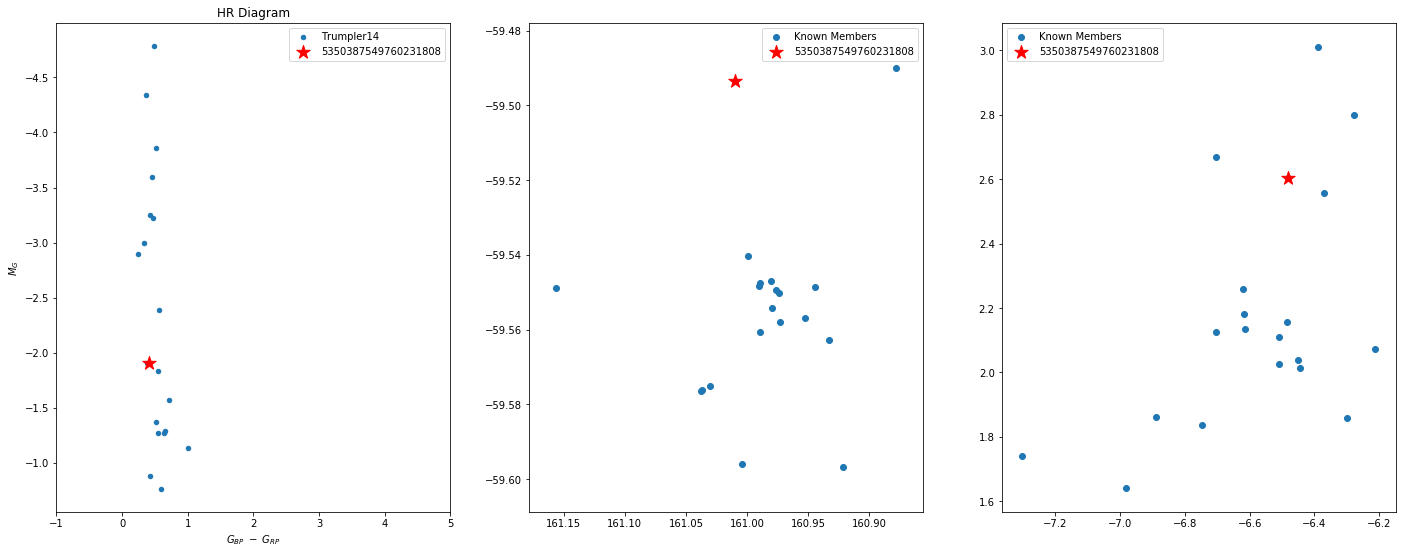

In [61]:
s=carina_members['Trumpler14'].objs.loc[5350387549760231808]
colors, mags = carina_members['Trumpler14'].get_colors()
fig = plt.figure(figsize=(24,9))
ax = fig.subplots(1,3)
carina_members['Trumpler14'].plot_hrdiagram(ax=ax[0], s=20)
ax[0].scatter(colors.loc[5350387549760231808], mags.loc[5350387549760231808],marker='*',s=200, color='Red', label='5350387549760231808')

ax[1].scatter(carina_members['Trumpler14'].objs.ra, carina_members['Trumpler14'].objs.dec, label='Known Members')
ax[1].scatter(s.ra, s.dec, marker='*', color='red',  s=200, label='5350387549760231808')
ax[1].invert_xaxis()

ax[2].scatter(carina_members['Trumpler14'].objs.pmra, carina_members['Trumpler14'].objs.pmdec, label='Known Members')
ax[2].scatter(s.pmra, s.pmdec,  marker='*', color='red',  s=200, label='5350387549760231808')

for a in ax:
    a.legend()

In [62]:
#carina_cluster_names = list(carina_members.keys())
# can only deal with the Trumplers at the momemnt
carina_cluster_names = ['Trumpler14', 'Trumpler15', 'Trumpler16']

In [63]:
for cl in carina_cluster_names:
    cli=trumpler_df.index.get_loc(cl)
    center=trumpler_coords[cli]
    coords = carina_members[cl].get_coords()
    cen_dists = center.separation_3d(coords).to_value(u.pc)
    carina_members[cl].objs['DistanceFromCenter'] = cen_dists

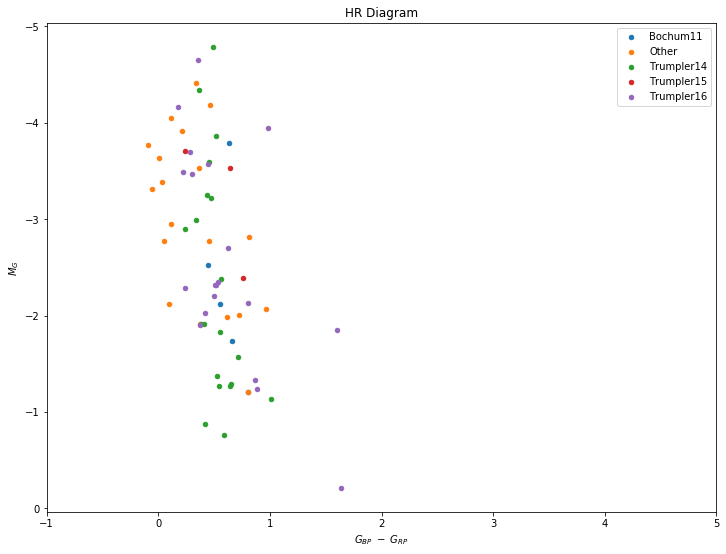

In [64]:
fig = plt.figure(figsize=(12,9))
ax = plt.subplot(111)
for cl in carina_members:
    carina_members[cl].plot_hrdiagram(ax=ax, s=20)
ax.legend()

In [65]:
known_cluster_members, cluster_names = getGAIAKnownMembers()
print(cluster_names)
# gaiadr2 to gaiaedr3 mapper
from  gaiastars import gaiadr2xdr3
# just deal with Pleiades and alphaPer for now
cluster_names = ['Pleiades', 'alphaPer']
xmatches = {}
cluster_members={}
#for cl in cluster_names:
for cl in cluster_names:
    known_members_dr2 = list(known_cluster_members.query('Cluster == @cl').index)
    xmatches[cl] = gaiadr2xdr3(known_members_dr2)
    cluster_members[cl]  = gs(name = cl, description=f'{cl} sources from Table 1a records from Gaia archive')
    cluster_members[cl].from_source_idlist(list(xmatches[cl].dr3_source_id),schema='gaiaedr3', query_type='sync')

['Hyades' 'ComaBer' 'Pleiades' 'Praesepe' 'alphaPer' 'IC2391' 'IC2602'
 'Blanco1' 'NGC2451']
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


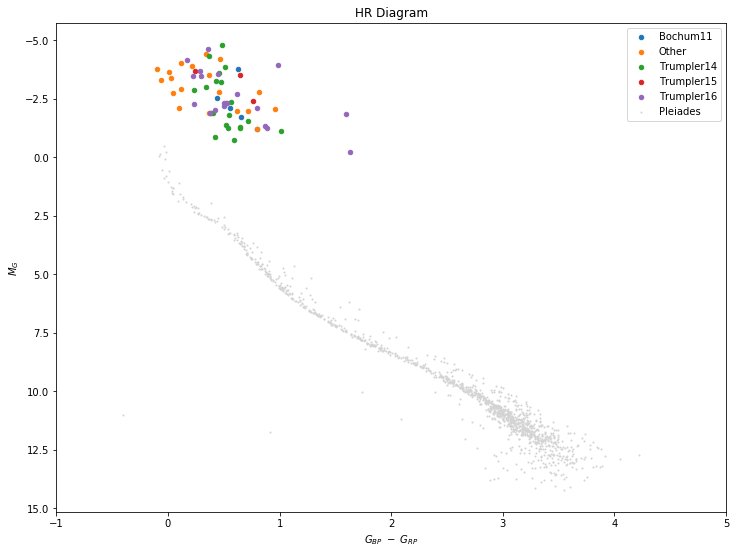

In [66]:
fig = plt.figure(figsize=(12,9))
ax = plt.subplot(111)
for cl in carina_members:
    carina_members[cl].plot_hrdiagram(ax=ax, s=20)
cluster_members['Pleiades'].plot_hrdiagram(ax=ax, color='lightgrey', label='Pleiades')
ax.legend()

In [67]:
print('\n--- Min/Max distance of Known Members from Cluster Center ---\n')
for cl in carina_cluster_names:
    print(f'Cluster: {cl}, Min distance: {carina_members[cl].objs.DistanceFromCenter.min():.2f} pc, Max distance: {carina_members[cl].objs.DistanceFromCenter.max():.2f} pc' )


--- Min/Max distance of Known Members from Cluster Center ---

Cluster: Trumpler14, Min distance: 11.60 pc, Max distance: 685.98 pc
Cluster: Trumpler15, Min distance: 23.14 pc, Max distance: 161.58 pc
Cluster: Trumpler16, Min distance: 3.68 pc, Max distance: 390.31 pc


In [68]:
carina_search_results = {}

from gaiastars import from_pickle

for cl in carina_cluster_names:
    carina_search_results[cl] = from_pickle(f'./data/search_results_{cl}.pkl')

In [69]:
for cl in carina_cluster_names:
    cli=trumpler_df.index.get_loc(cl)
    center=trumpler_coords[cli]
    coords = carina_search_results[cl].get_coords()
    cen_dists = center.separation_3d(coords).to_value(u.pc)
    cen_seps = center.separation(coords).to_value(u.arcsecond)
    carina_search_results[cl].objs['DistanceFromCenter'] = cen_dists
    carina_search_results[cl].objs['SeparationCenter']= cen_seps
    # known members
    coords = carina_members[cl].get_coords()
    cen_dists = center.separation_3d(coords).to_value(u.pc)
    cen_seps = center.separation(coords).to_value(u.arcsecond)
    carina_members[cl].objs['DistanceFromCenter'] = cen_dists
    carina_members[cl].objs['SeparationCenter']= cen_seps


In [70]:
#exclude the known members returned from the search
for cl in carina_cluster_names:
    sr = set(carina_search_results[cl].objs.index)
    km = set(carina_members[cl].objs.index)
    usr = sr - km
    ukm = km - sr
    print(f'Cluster: {cl}, known members: {len(km)}, Search Results: {len(sr)}, Unique SR: {len(usr)}, Unrec KM: {len(ukm)}')
    carina_search_results[cl].objs = carina_search_results[cl].objs.loc[usr].copy()
    print(f'After removal, {len(carina_search_results[cl])}')
    print()


Cluster: Trumpler14, known members: 20, Search Results: 8464, Unique SR: 8458, Unrec KM: 14
After removal, 8458

Cluster: Trumpler15, known members: 3, Search Results: 8170, Unique SR: 8169, Unrec KM: 2
After removal, 8169

Cluster: Trumpler16, known members: 21, Search Results: 8872, Unique SR: 8867, Unrec KM: 16
After removal, 8867



## Why aren't the Known Members Showing up in Search Results?
Theory = separation > 1 degree or parallax out of range

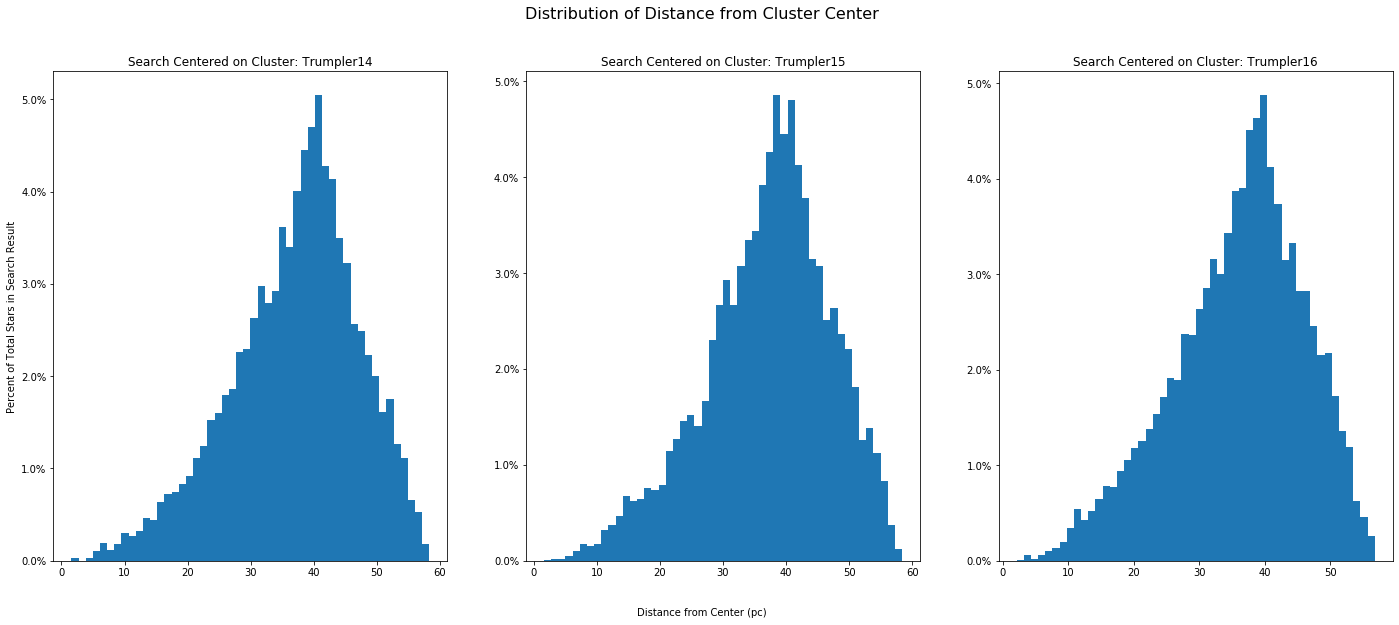

In [71]:
from matplotlib.ticker import PercentFormatter
fig = plt.figure(figsize=(24,9))
axs = fig.subplots(1,3)
for ax, cl in zip(axs, carina_search_results):
    ax.hist(carina_search_results[cl].objs.DistanceFromCenter, bins=50, label='Search Results', density=True)
    #ax.hist(carina_members[cl].objs.DistanceFromCenter,bins=50, label='Known Members', density=True)
    ax.set_title(f'Search Centered on Cluster: {cl}')
    # Now we format the y-axis to display percentage
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))

axs[0].set_ylabel("Percent of Total Stars in Search Result")
#axs[1].set_xlabel('Proper Motion in Right Ascension (mas/year)')
zz=fig.suptitle("Distribution of Distance from Cluster Center", size=16)
zz=fig.text(0.5, 0.04, 'Distance from Center (pc)', ha='center')

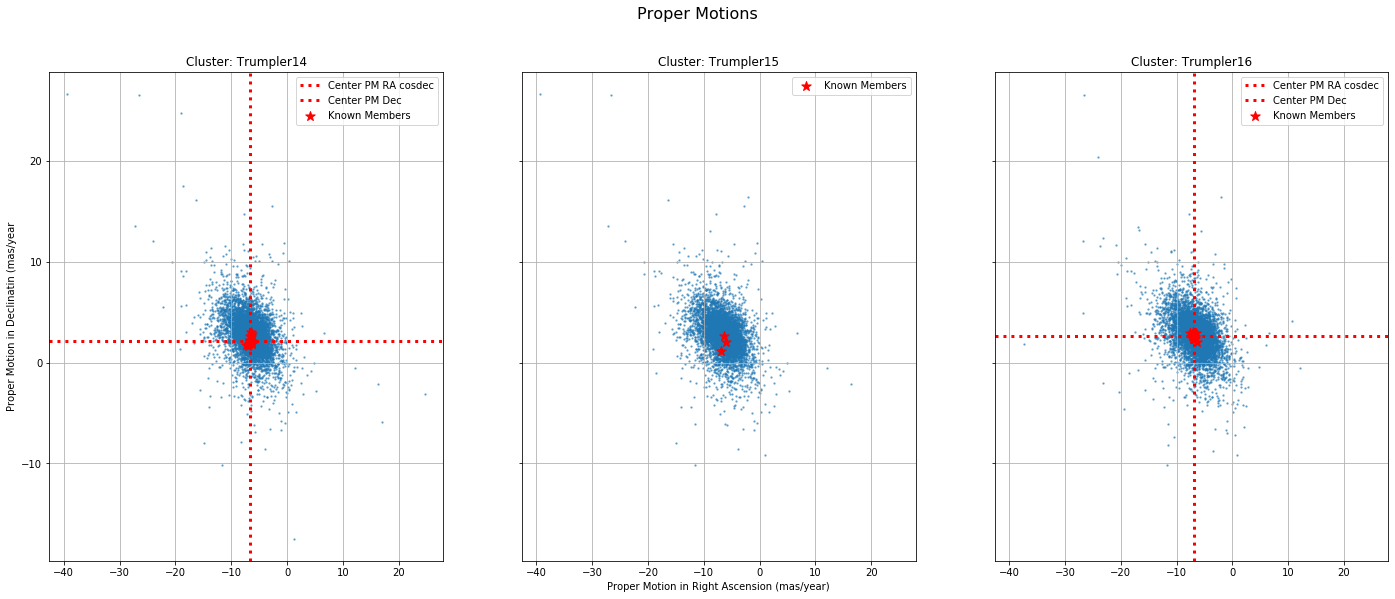

In [72]:
pmrarng = pmdecrng = None
#pmrarng = (-10,-2)
#pmdecrng = (0,5)

fig = plt.figure(figsize=(24,9))
axs = fig.subplots(1,3, sharex=True, sharey=True)
for ax, cl in zip(axs, carina_search_results):

    ax.scatter(carina_search_results[cl].objs.pmra, carina_search_results[cl].objs.pmdec,s=2, alpha=0.5)
    if np.isfinite(trumpler_df.loc[cl].pm_ra_cosdec):
        ax.axvline(trumpler_df.loc[cl].pm_ra_cosdec, ls=':', color='red', lw=3, label='Center PM RA cosdec')
        ax.axhline(trumpler_df.loc[cl].pm_dec, ls=':', color='red', lw=3, label='Center PM Dec')

    ax.scatter(carina_members[cl].objs.pmra, carina_members[cl].objs.pmdec, s=100,marker='*', color='red', label='Known Members')
    ax.grid()

    ax.legend(loc='upper right')
    ax.set_title(f'Cluster: {cl}')
    ax.set_xlim(pmrarng)
    ax.set_ylim(pmdecrng)
axs[0].set_ylabel("Proper Motion in Declinatin (mas/year")
axs[1].set_xlabel('Proper Motion in Right Ascension (mas/year)')
zz=fig.suptitle("Proper Motions", size=16)

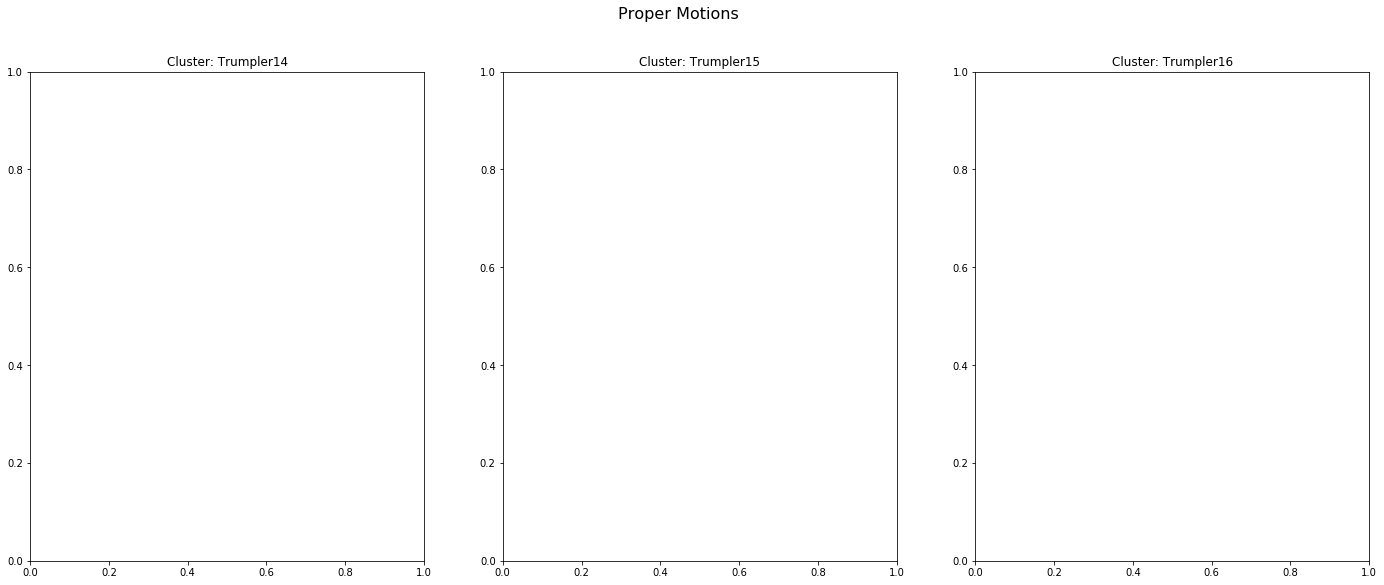

In [73]:
fig = plt.figure(figsize=(24,9))
axs = fig.subplots(1,3)
for ax, cl in zip(axs, carina_search_results):
    #carina_search_results[cl].plot_motions(ax=ax, cmap='BuGn')

    ax.set_title(f'Cluster: {cl}')
    #ax.set_xlim(-15,0)
    #ax.set_ylim(-1,6)

#axs[0].set_ylabel("Proper Motion in Declinatin (mas/year")
#axs[1].set_xlabel('Proper Motion in Right Ascension (mas/year)')
zz=fig.suptitle("Proper Motions", size=16)

In [74]:
# consoloidate the search results
sr1 = set(carina_search_results['Trumpler14'].objs.index)
sr2 = set(carina_search_results['Trumpler15'].objs.index) - sr1
sr3 = (set(carina_search_results['Trumpler16'].objs.index)- sr1) -sr2
srall = set(carina_search_results['Trumpler14'].objs.index).union(set(carina_search_results['Trumpler15'].objs.index),set(carina_search_results['Trumpler16'].objs.index))
print(f'Trumpler 14: {len(sr1)}, Trumpler15: {len(sr2)}, Trumpler16: {len(sr3)}')
sr_consol = pd.concat([carina_search_results['Trumpler14'].objs,
                       carina_search_results['Trumpler15'].objs.loc[sr2],
                       carina_search_results['Trumpler16'].objs.loc[sr3]], verify_integrity=True)
consol_gs = gs(name = 'Consolidates Search Results')
consol_gs.objs = sr_consol.copy()

assert set(consol_gs.objs.index) == srall

Trumpler 14: 8458, Trumpler15: 1897, Trumpler16: 5225


## Proximity Study

Text(0.5, 0.98, 'Proximity Density')

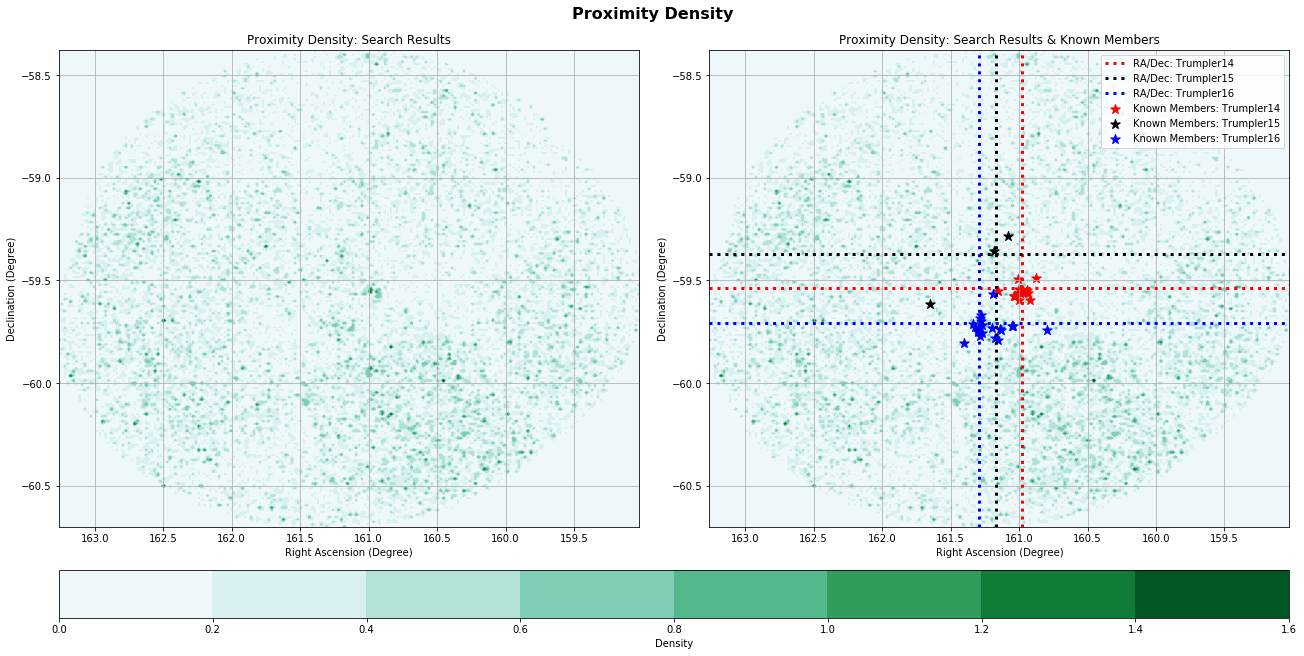

In [75]:
#    ax.set_xlim(-20,10)
#    ax.set_ylim(-10,10)
rarng = decrng = None
#rarng = (-10,-2)
#decrng = (0,5)

#df = consol_gs.objs.query('pmra >= @pmrarng[0] and pmra <= @pmrarng[1] and pmdec >= @pmdecrng[0] and pmdec <= @pmdecrng[1]')
df = consol_gs.objs
#df = carina_search_results['Trumpler14'].objs

fig = plt.figure(constrained_layout=True, figsize=(18,9))
gspec = fig.add_gridspec(2,2, height_ratios=[10,1])
cax = fig.add_subplot(gspec[1,:])
axs = [fig.add_subplot(gspec[0,0]), fig.add_subplot(gspec[0,1])]
first = True
for ax in axs:
    
    hist2d,xedges, yedges = np.histogram2d(df.ra, df.dec, bins=200, density=True)
    #contourf wants midpoints not edges apparently
    xmid = ((np.roll(xedges,-1)+xedges)/2.0)[:-1]
    ymid = ((np.roll(yedges,-1)+yedges)/2.0)[:-1]
    pcm = ax.contourf(xmid, ymid, hist2d.T, cmap='BuGn')
    
    if not first:
        for cl,c in zip(['Trumpler14','Trumpler15','Trumpler16'],['red','black','blue']):
            coord = trumpler_coords[trumpler_df.index.get_loc(cl)]
            if np.isfinite(coord.ra):
                ax.axvline(coord.ra.to_value(u.degree), ls=':', color=c, lw=3)
                ax.axhline(coord.dec.to_value(u.degree), ls=':', color=c, lw=3, label=f'RA/Dec: {cl}')
            ax.scatter(carina_members[cl].objs.ra, carina_members[cl].objs.dec,  s=100,marker='*', color=c, label=f'Known Members: {cl}')
            ax.legend(loc='upper right')
            ax.set_title('Proximity Density: Search Results & Known Members')
    else:
        ax.set_title('Proximity Density: Search Results')
    first = False
    ax.grid()
    ax.set_xlim(rarng)
    ax.set_ylim(decrng)
    ax.set_xlabel('Right Ascension (Degree)')
    ax.set_ylabel('Declination (Degree)')
    ax.invert_xaxis()

fig.colorbar(pcm, cax=cax, label='Density', orientation='horizontal')
fig.suptitle('Proximity Density', size=16, fontweight='bold')

## Motion Study

Text(0.5, 0, 'Distance from Sun (pc)')

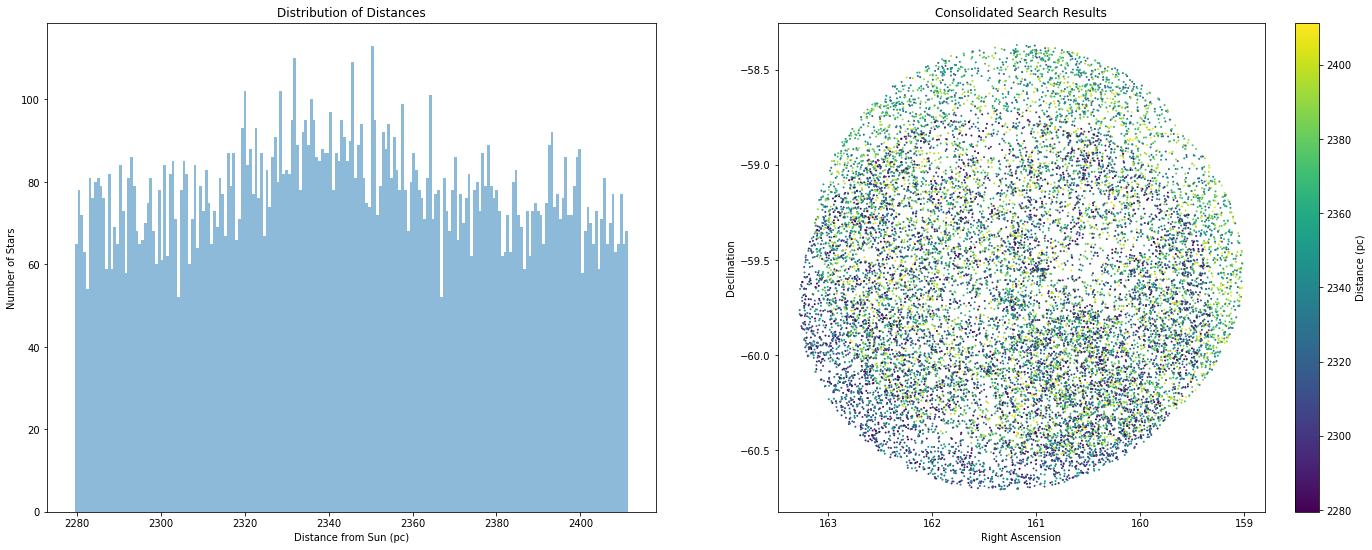

In [76]:
fig = plt.figure(figsize=(24,9))
ax = fig.subplots(1,2)

pcm=ax[1].scatter(consol_gs.objs.ra, consol_gs.objs.dec,  c= consol_gs.objs.r_est, s=1)
ax[1].invert_xaxis()
ax[1].set_xlabel('Right Ascension')
ax[1].set_ylabel('Declination')
ax[1].set_title('Consolidated Search Results')
fig.colorbar(pcm, label='Distance (pc)')

ax[0].hist(consol_gs.objs.r_est, bins=200, alpha=0.5)
ax[0].set_title('Distribution of Distances')
ax[0].set_ylabel('Number of Stars')
ax[0].set_xlabel('Distance from Sun (pc)')

/home/kevin_leo_mcmanus/anaconda3/envs/astro/lib/python3.7/site-packages/astropy/coordinates/angles.py:522: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/home/kevin_leo_mcmanus/anaconda3/envs/astro/lib/python3.7/site-packages/astropy/coordinates/angles.py:522: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/home/kevin_leo_mcmanus/anaconda3/envs/astro/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/kevin_leo_mcmanus/anaconda3/envs/astro/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


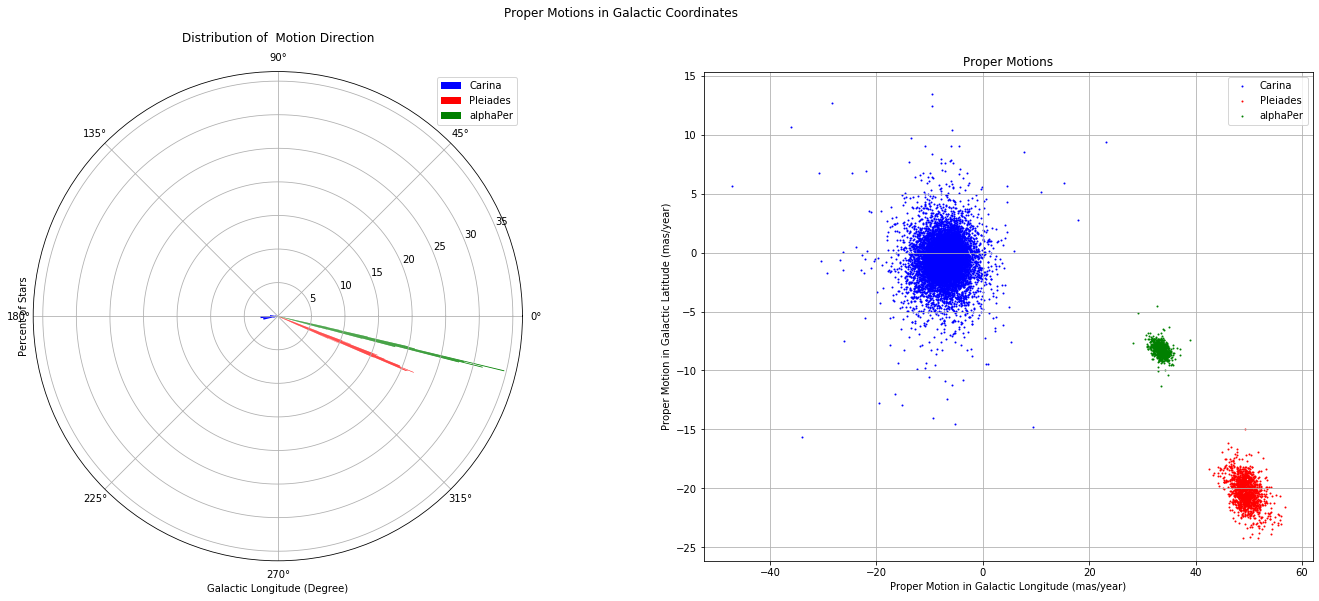

In [77]:

fig = plt.figure(figsize=(24,9))
ax0 = fig.add_subplot(1,2,1, projection='polar')
ax1 = fig.add_subplot(1,2,2)
fig.suptitle('Proper Motions in Galactic Coordinates')

ax0.set_title('Distribution of  Motion Direction')
ax0.set_xlabel('Galactic Longitude (Degree)')
ax0.set_ylabel('Percent of Stars')

ax1.grid()
ax1.set_title('Proper Motions')
ax1.set_ylabel('Proper Motion in Galactic Latitude (mas/year)')
ax1.set_xlabel('Proper Motion in Galactic Longitude (mas/year)')

density=True
bins=50

color='blue'
gal = consol_gs.get_coords().galactic
dir = np.arctan2(gal.pm_b.value, (gal.pm_l_cosb/np.cos(gal.b)).value)
dir = np.remainder(dir+2*np.pi, 2*np.pi)
zz=ax0.hist(dir, bins=bins, density=density, label='Carina', color=color)
ax1.scatter(gal.pm_l_cosb/np.cos(gal.b), gal.pm_b, s=1, color=color, label='Carina')

color='red'
gal = cluster_members['Pleiades'].get_coords().galactic
dir = np.arctan2(gal.pm_b.value, (gal.pm_l_cosb/np.cos(gal.b)).value)
dir = np.remainder(dir+2*np.pi, 2*np.pi)
zz=ax0.hist(dir, bins=bins, density=density, color=color, label='Pleiades')
ax1.scatter(gal.pm_l_cosb/np.cos(gal.b), gal.pm_b, s=1, color=color, label='Pleiades')

color='green'
gal = cluster_members['alphaPer'].get_coords().galactic
dir = np.arctan2(gal.pm_b.value, (gal.pm_l_cosb/np.cos(gal.b)).value)
dir = np.remainder(dir+2*np.pi, 2*np.pi)
zz=ax0.hist(dir, bins=bins, density=density, color=color, label='alphaPer')
ax1.scatter(gal.pm_l_cosb/np.cos(gal.b), gal.pm_b, s=1, color=color, label='alphaPer')

for ax in [ax0, ax1]:
    ax.legend()





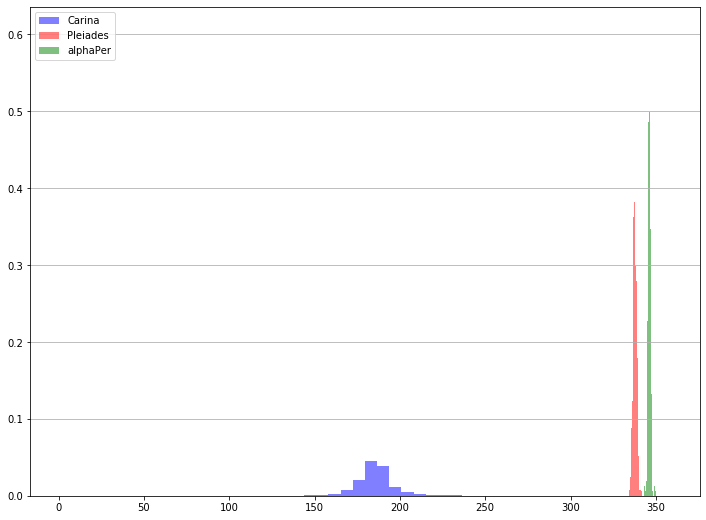

In [78]:
fig = plt.figure(figsize=(12,9))
ax0 = plt.subplot(111)
density=True
bins=50
alpha=0.5


color='blue'
gal = consol_gs.get_coords().galactic
dir = np.arctan2(gal.pm_b.value, (gal.pm_l_cosb/np.cos(gal.b)).value)
dir = np.degrees(np.remainder(dir+2*np.pi, 2*np.pi))
zz=ax0.hist(dir, bins=bins, density=density, label='Carina', color=color, alpha=alpha)


color='red'
gal = cluster_members['Pleiades'].get_coords().galactic
dir = np.arctan2(gal.pm_b.value, (gal.pm_l_cosb/np.cos(gal.b)).value)
dir = np.degrees(np.remainder(dir+2*np.pi, 2*np.pi))
zz=ax0.hist(dir, bins=bins, density=density, color=color, label='Pleiades', alpha=alpha)


color='green'
gal = cluster_members['alphaPer'].get_coords().galactic
dir = np.arctan2(gal.pm_b.value, (gal.pm_l_cosb/np.cos(gal.b)).value)
dir = np.degrees(np.remainder(dir+2*np.pi, 2*np.pi))
zz=ax0.hist(dir, bins=bins, density=density, color=color, label='alphaPer', alpha=alpha)
ax0.legend()
ax0.grid(axis='y')

In [79]:
dir[0:10]

array([346.78697894, 345.80653539, 346.43639609, 347.29236407,
       346.13830331, 346.15954322, 346.74225532, 346.18463345,
       346.17764043, 346.41752301])

In [80]:
gal[0]

<SkyCoord (Galactic): (l, b, distance) in (deg, deg, pc)
    (151.22225329, -9.01019199, 178.67261078)
 (pm_l_cosb, pm_b, radial_velocity) in (mas / yr, mas / yr, km / s)
    (31.36898593, -7.45706723, -5.38929096e-16)>

In [81]:
def plot_motions(self, **kwargs):
    from scipy.stats import kde
    ax = kwargs.get('ax')
    title = kwargs.get('title', 'Proper Motions')
    cmap = kwargs.get('cmap', 'viridis')
    nbins = kwargs.get('nbins', 300)
    norm = kwargs.get('norm',None)

    if ax is None:
        fig, yax = plt.subplots()
    else:
        yax = ax

    x = np.array(self.objs.pmra)
    y = np.array(self.objs.pmdec)

    # Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
    k = kde.gaussian_kde([x,y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))

    pcm = yax.pcolormesh(xi, yi, zi.reshape(xi.shape),cmap=cmap, norm=norm)

    yax.set_title(title)
    yax.set_ylabel('PM Dec (mas/yr)')
    yax.set_xlabel('PM RA (mas/yr)')

    if ax is None:
        fig.colorbar(pcm)

    return pcm

In [82]:
import matplotlib.colors as colors
#plot_motions(carina_search_results['Trumpler14'], cmap='BuGn', norm=colors.LogNorm())
#plot_motions(consol_gs, cmap='BuGn')

In [1]:
#    ax.set_xlim(-20,10)
#    ax.set_ylim(-10,10)
pmrarng = pmdecrng = None
#pmrarng = (-10,-2)
#pmdecrng = (0,5)

#df = consol_gs.objs.query('pmra >= @pmrarng[0] and pmra <= @pmrarng[1] and pmdec >= @pmdecrng[0] and pmdec <= @pmdecrng[1]')
df = consol_gs.objs
#df = carina_search_results['Trumpler14'].objs

fig = plt.figure(constrained_layout=True, figsize=(18,9))
gspec = fig.add_gridspec(2,2, height_ratios=[10,1])
cax = fig.add_subplot(gspec[1,:])
axs = [fig.add_subplot(gspec[0,0]), fig.add_subplot(gspec[0,1])]
first = True
for ax in axs:
    
    hist2d,xedges, yedges = np.histogram2d(df.pmra, df.pmdec, bins=200, density=True)
    #contourf wants midpoints not edges apparently
    xmid = ((np.roll(xedges,-1)+xedges)/2.0)[:-1]
    ymid = ((np.roll(yedges,-1)+yedges)/2.0)[:-1]
    pcm = ax.contourf(xmid, ymid, hist2d.T, cmap='BuGn')
    
    if not first:
        for cl,c in zip(['Trumpler14','Trumpler15','Trumpler16'],['red','black','blue']):
            if np.isfinite(trumpler_df.loc[cl].pm_ra_cosdec):
                ax.axvline(trumpler_df.loc[cl].pm_ra_cosdec, ls=':', color=c, lw=3)
                ax.axhline(trumpler_df.loc[cl].pm_dec, ls=':', color=c, lw=3, label=f'PM: {cl}')
            ax.scatter(carina_members[cl].objs.pmra, carina_members[cl].objs.pmdec,  s=100,marker='*', color=c, label=f'Known Members: {cl}')
            ax.legend(loc='upper right')
            ax.set_title('Proper Motion Density: Search Results & Known Members')
    else:
        ax.set_title('Proper Motion Density: Search Results')
    first = False
    ax.grid()
    ax.set_xlim(pmrarng)
    ax.set_ylim(pmdecrng)
    ax.set_xlabel('Proper Motion in Right Ascension (mas/year)')
    ax.set_ylabel('Proper Motion in Declination (mas/year)')

fig.colorbar(pcm, cax=cax, label='Density', orientation='horizontal')
fig.suptitle('Proper Motion Density', size=16, fontweight='bold')

NameError: name 'consol_gs' is not defined

In [84]:
hipoints = hist2d.flatten() >= 0.12
hipoints.sum()

6

In [85]:
indx = np.arange(len(hipoints))
hi_indx = indx[hipoints]
x_hi, y_hi=np.unravel_index(hi_indx, hist2d.shape)

In [86]:
for xi, yi in zip(x_hi, y_hi):
    print(f'Density: {hist2d[xi, yi]}, PMRA: {xmid[xi]}, PMDec: {ymid[yi]}')

Density: 0.12341728192939488, PMRA: -6.520617877428087, PMDec: 2.0687043653599257
Density: 0.1206948418868347, PMRA: -6.520617877428087, PMDec: 2.2892392945730524
Density: 0.12250980191520817, PMRA: -6.199903748559187, PMDec: 2.0687043653599257
Density: 0.12886216201451525, PMRA: -5.879189619690287, PMDec: 2.2892392945730524
Density: 0.1288621620145181, PMRA: -5.55847549082139, PMDec: 2.509774223786179
Density: 0.12160232190102145, PMRA: -5.237761361952494, PMDec: 2.509774223786179


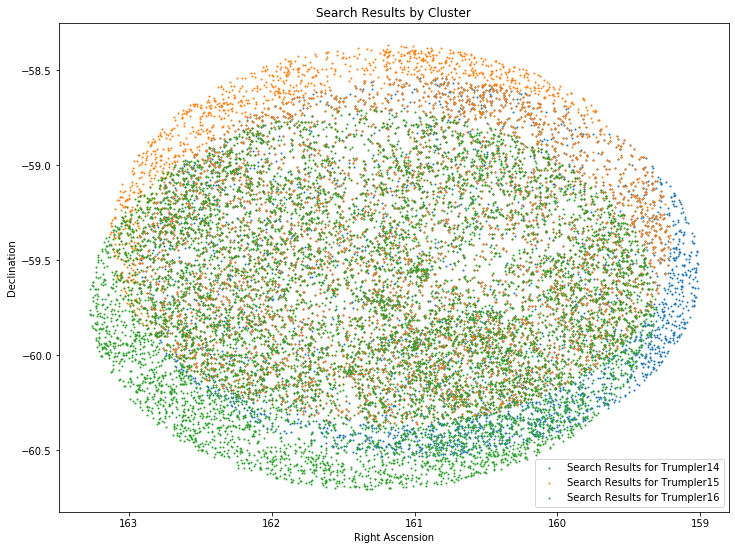

In [87]:
fig = plt.figure(figsize=(12,9))
ax = plt.subplot(111)
for cl in carina_search_results:
    ax.scatter(carina_search_results[cl].objs.ra, carina_search_results[cl].objs.dec, label=f'Search Results for {cl}', s=1)
ax.invert_xaxis()
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
ax.set_title('Search Results by Cluster')
ax.legend()

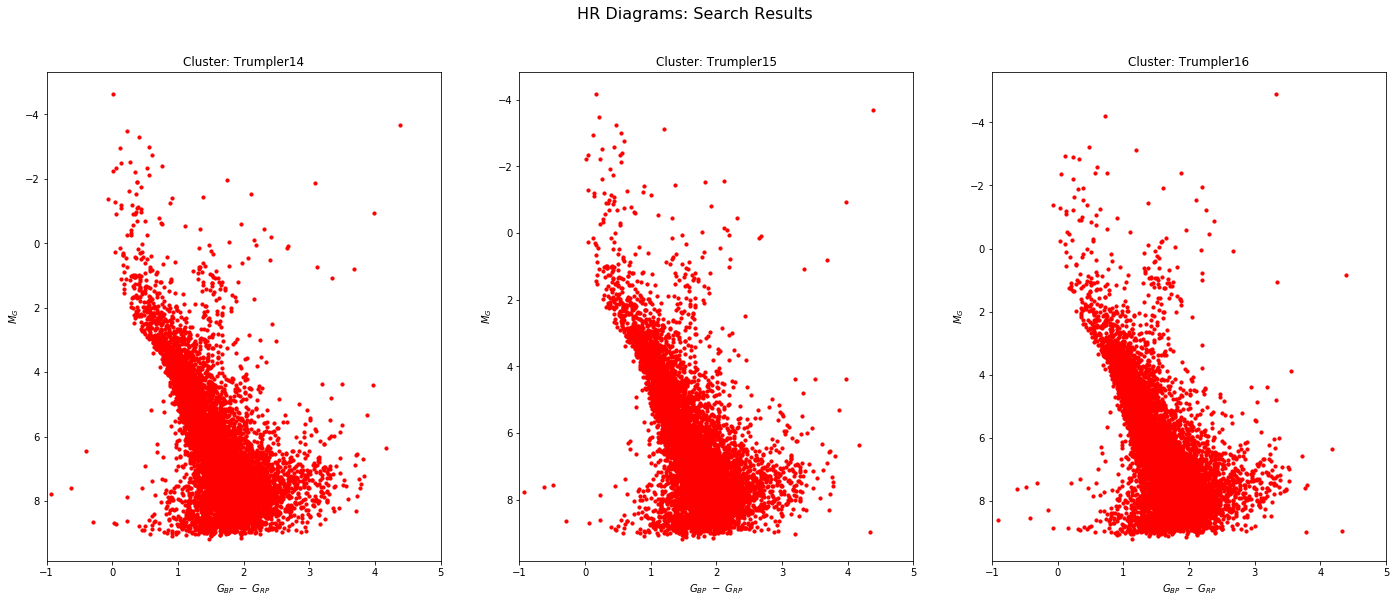

In [88]:
fig = plt.figure(figsize=(24,9))
axs = fig.subplots(1,3)
for ax, cl in zip(axs, carina_search_results):
    carina_search_results[cl].plot_hrdiagram(ax=ax, color='red', s=10)

    ax.set_title(f'Cluster: {cl}')

#axs[0].set_ylabel("Proper Motion in Declinatin (mas/year")
#axs[1].set_xlabel('Proper Motion in Right Ascension (mas/year)')
zz=fig.suptitle("HR Diagrams: Search Results", size=16)

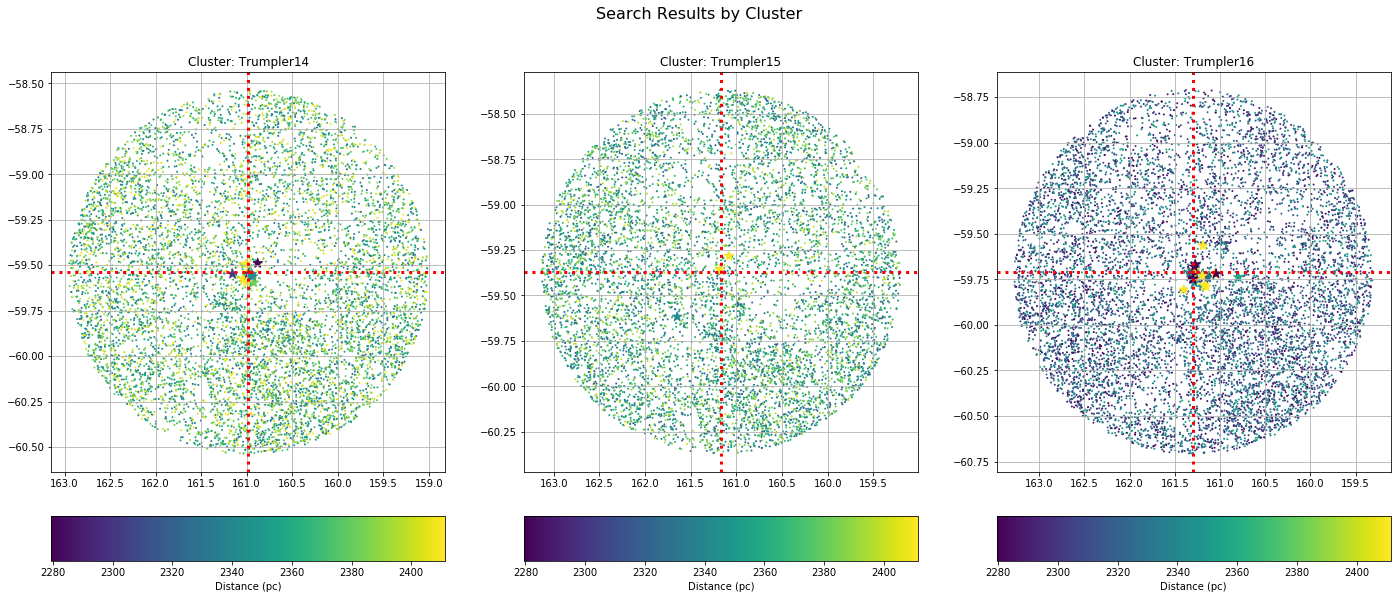

In [89]:
fig = plt.figure(figsize=(24,9))
#axs = fig.subplots(1,3, sharex=True, sharey=True)
#widths = [2, 3, 1.5]
heights = [9, 1]
spec5 = fig.add_gridspec(ncols=3, nrows=2, #width_ratios=widths,
                          height_ratios=heights)

r_est=np.concatenate([carina_search_results[cl].objs.r_est for cl in carina_search_results])
vmin = r_est.min(); vmax = r_est.max()

for col, cl, c in zip(range(len(carina_search_results)),carina_search_results,trumpler_coords):

    ax = fig.add_subplot(spec5[0, col])
    cax = fig.add_subplot(spec5[1, col])
    #cax.xaxis.set_visible(False)
    #cax.yaxis.set_visible(False)

    pcm = ax.scatter(carina_search_results[cl].objs.ra, carina_search_results[cl].objs.dec,s=1, c=carina_search_results[cl].objs.r_est,
                            vmin=vmin, vmax=vmax)
    ax.scatter(carina_members[cl].objs.ra, carina_members[cl].objs.dec, s=100,marker='*', c=carina_members[cl].objs.r_est,
                            vmin=vmin, vmax=vmax)
    coord = trumpler_coords[trumpler_df.index.get_loc(cl)]
    if np.isfinite(coord.ra):
        ax.axvline(coord.ra.to_value(u.degree), ls=':', color='Red', lw=3)
        ax.axhline(coord.dec.to_value(u.degree), ls=':', color='Red', lw=3, label=f'RA/Dec: {cl}')

    fig.colorbar(pcm, cax=cax, orientation="horizontal", label='Distance (pc)')

    #ax.axvline(c.ra.to_value(u.degree), ls=':', color='red', lw=3, label='Center RA')
    #ax.axhline(c.dec.to_value(u.degree), ls=':', color='red', lw=3, label='Center Dec')

    ax.grid()
    #ax.legend()
    ax.set_title(f'Cluster: {cl}')
    ax.invert_xaxis()
#axs[0].set_ylabel("Declination (Degrees)")
#axs[1].set_xlabel('Right Ascension (Degrees)')
zz=fig.suptitle("Search Results by Cluster", size=16)

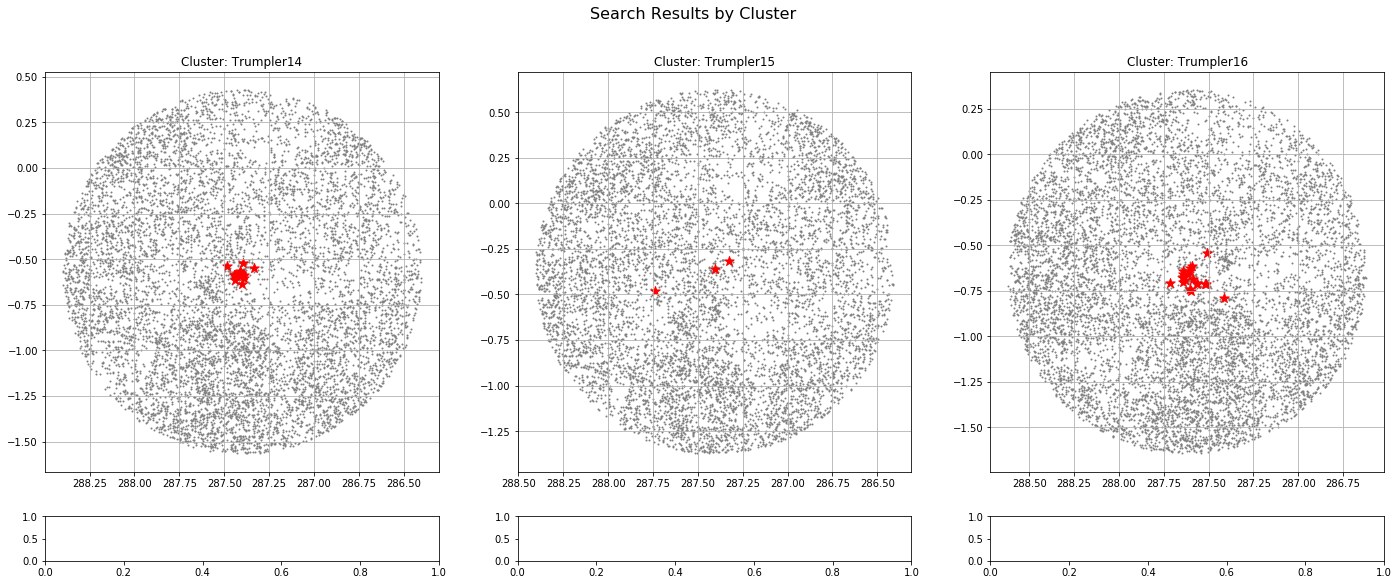

In [90]:
fig = plt.figure(figsize=(24,9))
#axs = fig.subplots(1,3, sharex=True, sharey=True)
#widths = [2, 3, 1.5]
heights = [9, 1]
spec5 = fig.add_gridspec(ncols=3, nrows=2, #width_ratios=widths,
                          height_ratios=heights)

r_est=np.concatenate([carina_search_results[cl].objs.r_est for cl in carina_search_results])
vmin = r_est.min(); vmax = r_est.max()

for col, cl, c in zip(range(len(carina_search_results)),carina_search_results,trumpler_coords):

    ax = fig.add_subplot(spec5[0, col])
    cax = fig.add_subplot(spec5[1, col])
    #cax.xaxis.set_visible(False)
    #cax.yaxis.set_visible(False)

    search_coords =  carina_search_results[cl].get_coords().galactic
    member_coords = carina_members[cl].get_coords().galactic

    pcm = ax.scatter(search_coords.l, search_coords.b, s=1, color='grey' )
                #c=carina_search_results[cl].objs.r_est, vmin=vmin, vmax=vmax)
    ax.scatter(member_coords.l, member_coords.b,  s=100,marker='*', color='red')
                # c=carina_members[cl].objs.r_est, vmin=vmin, vmax=vmax)

    #fig.colorbar(pcm, cax=cax, orientation="horizontal", label='Distance (pc)')

    #ax.axvline(c.ra.to_value(u.degree), ls=':', color='red', lw=3, label='Center RA')
    #ax.axhline(c.dec.to_value(u.degree), ls=':', color='red', lw=3, label='Center Dec')

    ax.grid()
    #ax.legend()
    ax.set_title(f'Cluster: {cl}')
    ax.invert_xaxis()
#axs[0].set_ylabel("Declination (Degrees)")
#axs[1].set_xlabel('Right Ascension (Degrees)')
zz=fig.suptitle("Search Results by Cluster", size=16)

In [91]:
n_stddevs = 2.0
carina_candidates = {}
for cl in  ['Trumpler14','Trumpler16']:
    cluster = trumpler_df.loc[cl]
    pmramin = cluster.pm_ra_cosdec - cluster.pm_ra_cosdec_error*n_stddevs
    pmramax = cluster.pm_ra_cosdec + cluster.pm_ra_cosdec_error*n_stddevs
    pmdecmin = cluster.pm_dec - cluster.pm_dec_error*n_stddevs
    pmdecmax = cluster.pm_dec + cluster.pm_dec_error*n_stddevs
    distmin = (cluster.distance - cluster.disterr*n_stddevs)*1000
    distmax = (cluster.distance + cluster.disterr*n_stddevs)*1000
    qrystr = f'pmra >= {pmramin} and pmra <= {pmramax} and pmdec >= {pmdecmin} and pmdec <= {pmdecmax} and r_est >= {distmin} and r_est <= {distmax}'

    carina_candidates[cl] = carina_search_results[cl].query(qrystr)
    color, mag = carina_candidates[cl].get_colors()
    need_label = np.logical_and(color <=1, mag <= 1)
    carina_candidates[cl].objs['need_label']= need_label
    carina_candidates[cl].objs['color']=color
    carina_candidates[cl].objs['mag'] = mag

In [92]:
for cl in ['Trumpler14','Trumpler16']:
    carina_candidates[cl].objs.drop(columns='label', inplace=True,errors='ignore')
    lbl_list = [chr(l) for l in range(ord('A'),ord('Z')+1)]
    lbl = iter(lbl_list)
    lbls = pd.Series([next(lbl) if s else '' for s in carina_candidates[cl].objs.need_label],
                index=carina_candidates[cl].objs.index, name='label')
    carina_candidates[cl].objs = carina_candidates[cl].objs.merge(lbls,left_index=True, right_index=True)
    

In [93]:
carina_candidates['Trumpler14'].objs.query('need_label')[['need_label','label','ra','dec', 'pmra', 'pmdec','color','mag', 'DistanceFromCenter']]

,need_label,label,ra,dec,pmra,pmdec,color,mag,DistanceFromCenter
source_id,,,,,,,,,
5350324327836087936,True,A,162.29190,-59.635530,-6.686020,2.210881,0.369158,-0.698935,28.758611
5350385591253129984,True,B,161.19692,-59.470989,-6.561543,2.121983,0.494400,0.626245,5.603569


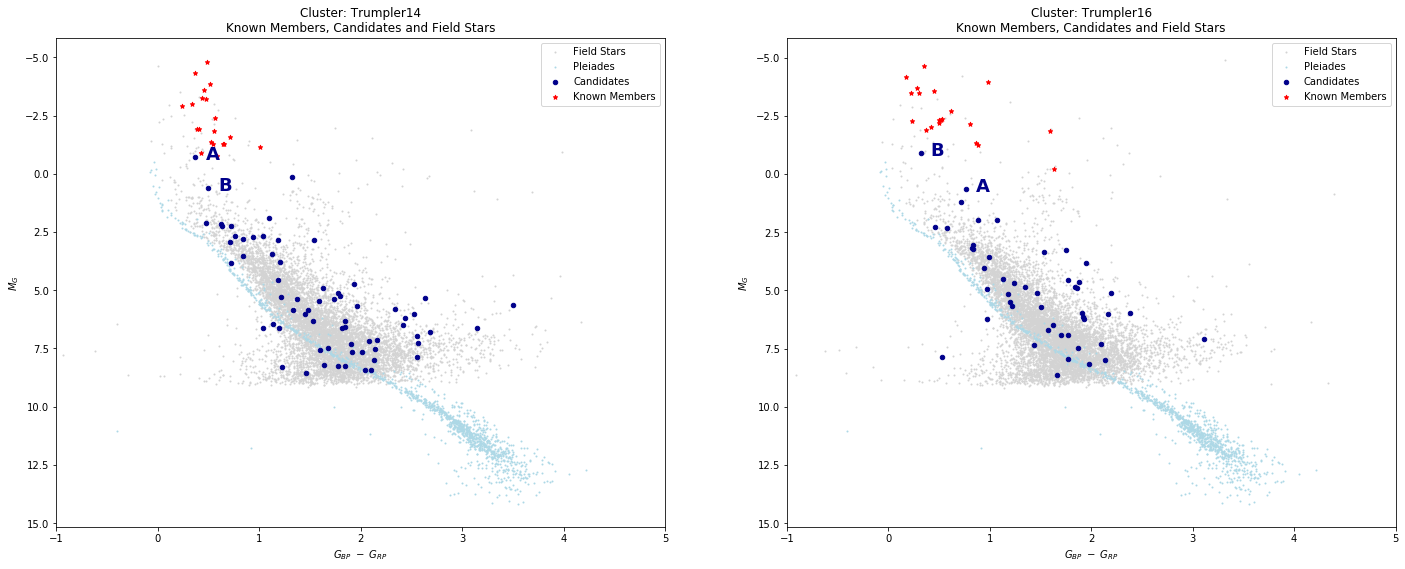

In [94]:
fig = plt.figure(figsize=(24,9))
axs = fig.subplots(1,2)

n_stddevs = 2.0
offset = 0.1

for ax,cl in  zip(axs,['Trumpler14','Trumpler16']):

    carina_search_results[cl].plot_hrdiagram(ax=ax, color='lightgrey', alpha=1, label='Field Stars')
    cluster_members['Pleiades'].plot_hrdiagram(ax=ax, color='lightblue', label='Pleiades')
    carina_candidates[cl].plot_hrdiagram(ax=ax,s=20, color='darkblue', label='Candidates')
    carina_members[cl].plot_hrdiagram(ax=ax, s=20, marker='*', label='Known Members', color='Red')

    for i,s in carina_candidates[cl].objs.query('need_label').iterrows():
        ax.text(s.color+offset, s.mag+offset, s.label, {'fontsize':18, 'fontweight':'bold', 'color':'darkblue'})

    ax.legend(loc='upper right')
    ax.set_title(f'Cluster: {cl}\nKnown Members, Candidates and Field Stars')

In [95]:
#.rename(columns={'source_id':'Gaia eDR3 source_id'})
for cl in ['Trumpler14', 'Trumpler16']:
    print(f'---------- {cl} --------------')
    print(carina_candidates[cl].objs.query('need_label').reset_index().rename(columns={'source_id':'Gaia eDR3 source_id'})[['label','Gaia eDR3 source_id','color','mag', 'DistanceFromCenter']].sort_values('label'))
    print()
#5350363807162637696

---------- Trumpler14 --------------
  label  Gaia eDR3 source_id     color       mag  DistanceFromCenter
0     A  5350324327836087936  0.369158 -0.698935           28.758611
1     B  5350385591253129984  0.494400  0.626245            5.603569

---------- Trumpler16 --------------
  label  Gaia eDR3 source_id     color       mag  DistanceFromCenter
0     A  5350357996056159872  0.767821  0.637021           10.529975
1     B  5350358378338864768  0.317542 -0.908712           17.819631



In [96]:
collist=['label','Gaia eDR3 source_id','ra', 'dec', 'parallax', 'pmra', 'pmdec', 'radial_velocity',
       'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag', 'ruwe',
       'ra_error', 'dec_error', 'parallax_error', 'pmra_error', 'pmdec_error',
       'radial_velocity_error', 'ra_dec_corr', 'ra_parallax_corr',
       'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr',
       'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr',
       'pmra_pmdec_corr', 'r_est', 'DistanceFromCenter', 'need_label', 'color',
       'mag']

In [97]:
import csv
for cl in ['Trumpler14', 'Trumpler16']:
    carina_candidates[cl].objs['Gaia eDR3 source_id'] = carina_candidates[cl].objs.index.astype(str)
    carina_candidates[cl].objs[collist].sort_values('label').to_csv(f'./data/carina_candiates_{cl}.csv',quoting=csv.QUOTE_NONNUMERIC, index=False)

In [98]:
from astroquery.simbad import Simbad

In [99]:
candidate_ids = {}
for cl in ['Trumpler14', 'Trumpler16']:
    cand_id_list = carina_candidates[cl].objs.query('need_label').index
    candidate_ids[cl] = {}
    for c in cand_id_list:
        label = carina_candidates[cl].objs.loc[c].label
        result_table=Simbad.query_objectids(f"Gaia DR2 {c}")
        if hasattr(result_table,'errors') and len(result_table.errors)>0:
            print(result_table.errors)
            simbad_id_list = []
        else:
            simbad_id_list = [] if result_table is None else [id for id in result_table['ID']]
        candidate_ids[cl][label] = {'gaiaedr3id':c, 'idlist':simbad_id_list}

/home/kevin_leo_mcmanus/anaconda3/envs/astro/lib/python3.7/site-packages/astroquery/simbad/core.py:138: UserWarning: Warning: The script line number 2 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : Gaia DR2 5350385591253129984
  (error.line, error.msg))
/home/kevin_leo_mcmanus/anaconda3/envs/astro/lib/python3.7/site-packages/astroquery/simbad/core.py:138: UserWarning: Warning: The script line number 2 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : Gaia DR2 5350358378338864768
  (error.line, error.msg))


In [100]:
candidate_ids

{'Trumpler14': {'A': {'gaiaedr3id': 5350324327836087936,
   'idlist': ['TIC 459331897',
    'TYC 8626-2327-1',
    '2MASS J10491007-5938079',
    'Gaia DR1 5350324323510914304',
    'Gaia DR2 5350324327836087936']},
  'B': {'gaiaedr3id': 5350385591253129984, 'idlist': []}},
 'Trumpler16': {'A': {'gaiaedr3id': 5350357996056159872,
   'idlist': ['TIC 458859471',
    'Cl* Trumpler   14      Y     216',
    'Cl* Trumpler   16     MJ     421',
    '2MASS J10445220-5944212',
    'DETWC Tr 16 J104452.2-594421',
    'PCYC 703',
    '[HSB2012] 3020',
    'Gaia DR2 5350357996056159872']},
  'B': {'gaiaedr3id': 5350358378338864768, 'idlist': []}}}

In [101]:
for cl in candidate_ids:
    print(f'-------------- Cluster: {cl} ------------')
    for label in candidate_ids[cl]:
        g3id = candidate_ids[cl][label]['gaiaedr3id']
        print(f'Star: {label}, Gaia eDR3 ID: {g3id}, identifiers: ')
        if len(candidate_ids[cl][label]['idlist']) > 0:
            for s in candidate_ids[cl][label]['idlist']:
                print(f'\t{s}')
        else:
            print('\t<none found>')
        print()
    print()

-------------- Cluster: Trumpler14 ------------
Star: A, Gaia eDR3 ID: 5350324327836087936, identifiers: 
	TIC 459331897
	TYC 8626-2327-1
	2MASS J10491007-5938079
	Gaia DR1 5350324323510914304
	Gaia DR2 5350324327836087936

Star: B, Gaia eDR3 ID: 5350385591253129984, identifiers: 
	<none found>


-------------- Cluster: Trumpler16 ------------
Star: A, Gaia eDR3 ID: 5350357996056159872, identifiers: 
	TIC 458859471
	Cl* Trumpler   14      Y     216
	Cl* Trumpler   16     MJ     421
	2MASS J10445220-5944212
	DETWC Tr 16 J104452.2-594421
	PCYC 703
	[HSB2012] 3020
	Gaia DR2 5350357996056159872

Star: B, Gaia eDR3 ID: 5350358378338864768, identifiers: 
	<none found>




In [102]:
candidate_ids[cl][label]

{'gaiaedr3id': 5350358378338864768, 'idlist': []}

In [103]:
coords = carina_candidates[cl].query('need_label').get_coords()

In [104]:
result_table = Simbad.query_region(coords[0])

In [105]:
print(result_table)

          MAIN_ID                  RA      ...     COO_BIBCODE    
                                "h:m:s"    ...                    
---------------------------- ------------- ... -------------------
     2MASS J10445220-5944212 10 44 52.2023 ... 2018yCat.1345....0G
  CXOGNC J104451.11-594425.5  10 44 51.118 ... 2011ApJS..194...12W
Gaia DR2 5350357996057054208 10 44 52.7407 ... 2018yCat.1345....0G
  CXOGNC J104453.72-594425.8  10 44 53.728 ... 2011ApJS..194...12W
              [HSB2012] 2975  10 44 50.511 ... 2003yCat.2246....0C
               [ESK2003]  78 10 44 51.3395 ... 2018yCat.1345....0G
  CXOGNC J104454.38-594423.8 10 44 54.3907 ... 2018yCat.1345....0G
  CXOGNC J104450.19-594429.4  10 44 50.194 ... 2011ApJS..194...12W
  CXOGNC J104450.90-594435.4  10 44 50.911 ... 2003yCat.2246....0C
Gaia DR2 5350358000365955072 10 44 52.5722 ... 2018yCat.1345....0G
                         ...           ... ...                 ...
  CXOGNC J104450.19-594223.5  10 44 50.198 ... 2011ApJS..194..

In [106]:
result_table.columns

<TableColumns names=('MAIN_ID','RA','DEC','RA_PREC','DEC_PREC','COO_ERR_MAJA','COO_ERR_MINA','COO_ERR_ANGLE','COO_QUAL','COO_WAVELENGTH','COO_BIBCODE')>

In [107]:
result_table=Simbad.query_objectids("Gaia DR2 5338449533560603008")

In [108]:
result_table

ID
bytes28
TIC 459652333
CPD-58 2813
HD 94379
[GL65] 256
uvby98 100094379
TYC 8626-873-1
2MASS J10523030-5905193
Gaia DR1 5338449529216672128
GEN# +1.00094379


In [109]:
print(result_table)

             ID             
----------------------------
               TIC 459652333
                CPD-58  2813
                   HD  94379
                  [GL65] 256
            uvby98 100094379
              TYC 8626-873-1
     2MASS J10523030-5905193
Gaia DR1 5338449529216672128
            GEN# +1.00094379
Gaia DR2 5338449533560603008


In [110]:
[s for s in result_table['ID']]

['TIC 459652333',
 'CPD-58  2813',
 'HD  94379',
 '[GL65] 256',
 'uvby98 100094379',
 'TYC 8626-873-1',
 '2MASS J10523030-5905193',
 'Gaia DR1 5338449529216672128',
 'GEN# +1.00094379',
 'Gaia DR2 5338449533560603008']

In [111]:
zz.gaia_column_dict_gaiaedr3

AttributeError: 'Text' object has no attribute 'gaia_column_dict_gaiaedr3'

In [ ]:
def get_covar(t_ser):
    """
    Returns 3x3 covariance matrix for U', V' and W'
    """
    #ref: https://stats.stackexchange.com/questions/62850/obtaining-covariance-matrix-from-correlation-matrix
    
    # form correlation matrix R (dims: {U, V, W} x {U, V, W})
    R = np.array([ [ 1,          t_ser.cUV, t_ser.cUW],
                   [ t_ser.cUV,  1,         t_ser.cVW],
                   [ t_ser.cUW,  t_ser.cVW,  1        ]
                 ])
    # form diagnonal matrix of std devs
    diag_s = np.diag([t_ser.e_U, t_ser.e_V, t_ser.e_W])
    
    # covar matrix is corr matrix pre- and post-multiplied by the std devs
    covar = diag_s.dot(R.dot(diag_s))
    
    return covar